***Didem Kahyaoğlu <br> Selen Çiğdem***

#Step 1(With Math, Manuel )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# create synthetic data
n = 1000;

def v_for_vendetta(x,alfa=10.5,beta=1,noiseLevel=0):
  noise = np.random.normal(0, 1, n)*noiseLevel
  return np.log(alfa*np.square(x)+beta) + noise

x = np.random.normal(0, 1, n) #zero mean, 1 std
y=v_for_vendetta(x,noiseLevel=0.2)
print("Shape of x is ", x.shape)
print("Shape of y is ", y.shape)

Shape of x is  (1000,)
Shape of y is  (1000,)


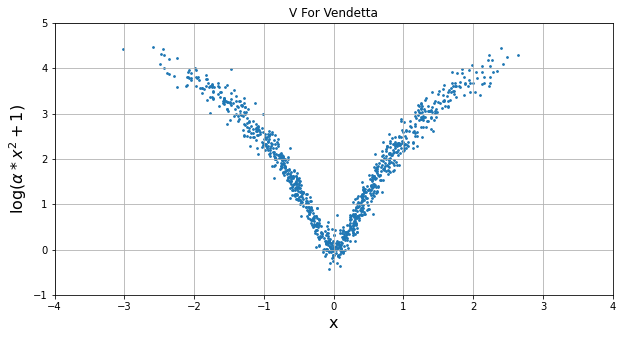

In [2]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.grid()
plt.scatter(x, y, s = 3)
plt.title('V For Vendetta')
plt.xlabel('x', fontsize=16)
plt.xticks(range(-4,5))
plt.yticks(range(-1,6))
plt.ylabel(r'log($\alpha*x^{2}+1)$', fontsize=16)
plt.show()

In [5]:
x1=np.square(x)
X_b=np.c_[np.ones((n, 1)), x1]
y_mapped=np.exp(y)
X_b.shape

(1000, 2)

**Mapping Nonlinear Data Into Linear Data:** We took the exponential of both sides of the equation to eliminate our coefficients to be estimated ($\beta_0$ and $\beta_1$) from the logarithm since we are making linear mapping and logaritmic function is non-linear. Now, our polynomial regression model is trying to  estimate $e^y$, we assigned it to y_mapped to prevent confusion. We defined new feature called x1 which is equal to $x^2$ since second order polynomial term is not linear. There is no need to map for $\beta_0$  we just added a column with a value of one to the right of x1 which represents $x^0$ since $\beta_0$ is the coefficient of $x^0$.
Then, equation became:<br>$\beta_0+\beta_1*x1 =$ y_new

In [6]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_mapped)
print('[beta0, beta1] = ', w_estimate)

[beta0, beta1] =  [ 1.13463225 10.70594682]


In [7]:
y_hat = X_b.dot(w_estimate)
y_hat.shape
y_hat=np.log(y_hat) #take log before plot data sine our function is estimating e^y rather then y

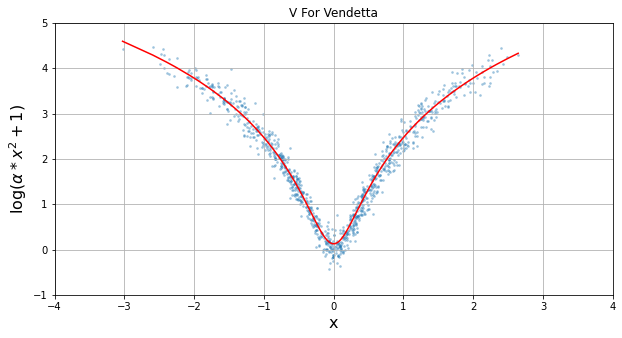

In [8]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.scatter(x, y, s = 3,alpha=0.3)
x_s, y_hat_s = zip(*sorted(zip(x, y_hat))) #sorted x and y_hat to be able to plot proper graph
plt.plot(x_s, y_hat_s,color="r")
plt.title('V For Vendetta')
plt.xlabel('x', fontsize=16)
plt.ylabel(r'log($\alpha*x^{2}+1)$', fontsize=16)
plt.xticks(range(-4,5))
plt.yticks(range(-1,6))
plt.show()

#Step 2(with PolynomialFeatures then LinearRegression)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_input = x[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)
print(x_mapped)

[[1.         0.42616035 0.18161264]
 [1.         1.44754703 2.0953924 ]
 [1.         1.07115982 1.14738335]
 ...
 [1.         0.1524846  0.02325155]
 [1.         1.36100055 1.8523225 ]
 [1.         0.42027348 0.1766298 ]]


In [10]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_mapped, y)

# Predicting values using our trained model
y_hat = regressor.predict(x_mapped)

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_mapped, y_new) 

# Predicting values using our trained model
y_hat = regressor.predict(x_mapped)
y_hat=np.log(y_hat)

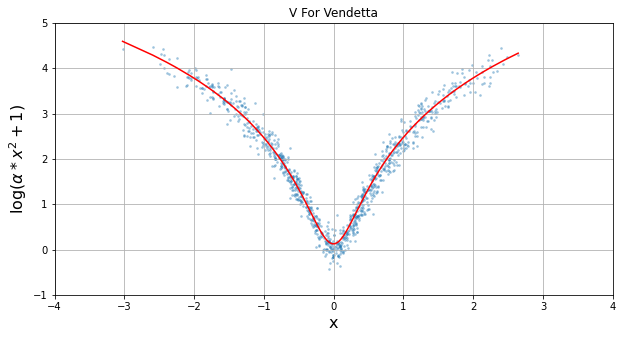

In [12]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.grid()
plt.scatter(x, y, s = 3,alpha=0.3)
x_s, y_hat_s = zip(*sorted(zip(x, y_hat))) #sorted x and y_hat to be able to plot proper graph
plt.plot(x_s, y_hat_s, color='red')
plt.title('V For Vendetta')
plt.xlabel('x', fontsize=16)
plt.ylabel(r'log($\alpha*x^{2}+1)$', fontsize=16)
plt.xticks(range(-4,5))
plt.yticks(range(-1,6))
plt.show()

#Step 3 (with Pipline which includes PolynomialFeatures followed by LinearRegression)

In [15]:
from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = x[:,np.newaxis]
poly_regression.fit(x_input, y_mapped)
y_hat = poly_regression.predict(x_input)
y_hat=np.log(y_hat)

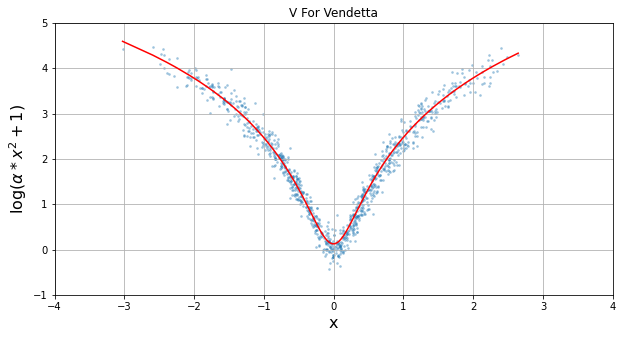

In [19]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.grid()
plt.scatter(x, y, s = 3,alpha=0.3)
x_s, y_hat_s = zip(*sorted(zip(x, y_hat))) #sorted x and y_hat to be able to plot proper graph
plt.plot(x_s, y_hat_s, color='red')
plt.title('V For Vendetta')
plt.xlabel('x', fontsize=16)
plt.ylabel(r'log($\alpha*x^{2}+1)$', fontsize=16)
plt.xticks(range(-4,5))
plt.yticks(range(-1,6))
plt.show()